# Cancer Malignancy using Logistic Regression model with Python and Tensorflow

In [2]:
# Importing all the required libraries

import pandas as pd #This is for handling data
import numpy as np #For scientific computing
import tensorflow as tf # For Machine Learning Model
import matplotlib.pyplot as plt #For Data Visualization
#Ease of use for the matplotlib library
%matplotlib inline

In [8]:
#Reading the Data from a .csv file
data = pd.read_csv('cancer_data.csv') #data.csv is downloaded from Kaggle
data.head(10) #This command prints the first 10 rows of the data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


### In Data "diagnosis" column M=Malignant(Cancer is present) B=Benign(No Cancer)

In [66]:
#Preparing Data for Inputs X and Outputs Y
X_data = data.drop(['id','diagnosis','Unnamed: 32'],1).astype(np.float32) # index 1 is diagnosis and id column and changing into float32 datatype
Y_data = data.diagnosis #Getting outputs for supervised ML model

In [67]:
#Getting the data right for feeding into Algorithm
print("X_data Counts for all the variables :\n",X_data.count())
print("Y_data Counts to get an insight of data",Y_data.count())
Y_data=(Y_data=='M').astype(np.float32) # To make M,B into 1,0 i,e. bools

X_data Counts for all the variables :
 radius_mean                569
texture_mean               569
perimeter_mean             569
area_mean                  569
smoothness_mean            569
compactness_mean           569
concavity_mean             569
concave points_mean        569
symmetry_mean              569
fractal_dimension_mean     569
radius_se                  569
texture_se                 569
perimeter_se               569
area_se                    569
smoothness_se              569
compactness_se             569
concavity_se               569
concave points_se          569
symmetry_se                569
fractal_dimension_se       569
radius_worst               569
texture_worst              569
perimeter_worst            569
area_worst                 569
smoothness_worst           569
compactness_worst          569
concavity_worst            569
concave points_worst       569
symmetry_worst             569
fractal_dimension_worst    569
dtype: int64
Y_data Counts to g

In [78]:
# To get the pandas Data Frame into Numpy Array for easy feeding to the Tensorflow
x_data=X_data.as_matrix()
y_data=Y_data.as_matrix().reshape(-1,1) # to get as Matrix from vector

In [79]:
#To check for the shape of data
print(x_data.shape,y_data.shape)

(569, 30) (569, 1)


## So the data has 30 parameters for training input and 1 parameter output (YES,NO)
## and 569 examples of data
## We will split the data into Training and Test data for getting the models accuracy

In [94]:
# Getting the package that divides the test and train data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_data,Y_data,train_size=0.9,random_state=6)

In [96]:
#To verify the data shapes
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(512, 30) (512,) (57, 30) (57,)


In [100]:
#Making to feed into the Tensorflow 
#Because we need data shapes to be (data as columns,m_examples)
X_train=x_train.T
X_test=x_test.T
Y_train=y_train.reshape(-1,1).T
Y_test=y_test.reshape(-1,1).T
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(30, 512) (1, 512) (30, 57) (1, 57)


/Users/abhishek/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """
/Users/abhishek/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [107]:
# Making Computational Graph for the Tensorflow 
#Forward Propagation
X = tf.placeholder(tf.float32,shape=[30,None]) # Number examples can vary with each forward pass
Y = tf.placeholder(tf.float32,shape=[1,None]) # So Kept None as columns number

# Defining the Weights and Biases ie parameters to get the Output from the data
W = tf.Variable(tf.random_normal((1,30)))
b = tf.Variable(tf.random_normal((1,1)))

# Output through sigmoid activation functions
Y_out = tf.matmul(W,X)+b

In [114]:
#defining Loss
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y,logits=Y_out))

In [120]:
# Defining the optimizer
opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss)

In [146]:
### Lest Us see the Accuracy of the model over Test Data
def accuracy(Y_labels,Y_preds):
    Y_preds=Y_preds>=0.5
    acc=(Y_labels==Y_preds)
    return np.sum(acc)/acc.size

In [155]:
epochs=5000 # Number of times it should be trained upon complete train data
with tf.Session() as sess:
    loss_train=[]
    loss_test=[]
    acc=[]
    sess.run(tf.global_variables_initializer())
    for epoch in range(epochs+1):
        _ = sess.run([opt],feed_dict={X:X_train,Y:Y_train})
        if epoch%200==0:
            loss_train.append(sess.run([loss],feed_dict={X:X_train,Y:Y_train}))
            loss_test.append(sess.run([loss],feed_dict={X:X_test,Y:Y_test}))
            acc.append(100*accuracy(Y_test,sess.run(Y_out,feed_dict={X:X_test})))
            #print(f"Loss for test at epoch {epoch} is Train:{loss_train},  Test:{loss_test}")
    print(f"Accuracy is : {max(acc)}%")
print("Completed the Training ")

Accuracy is : 92.98245614035088%
Completed the Training 


## Now Lets Visualize the Decay of Loss in Training and Test

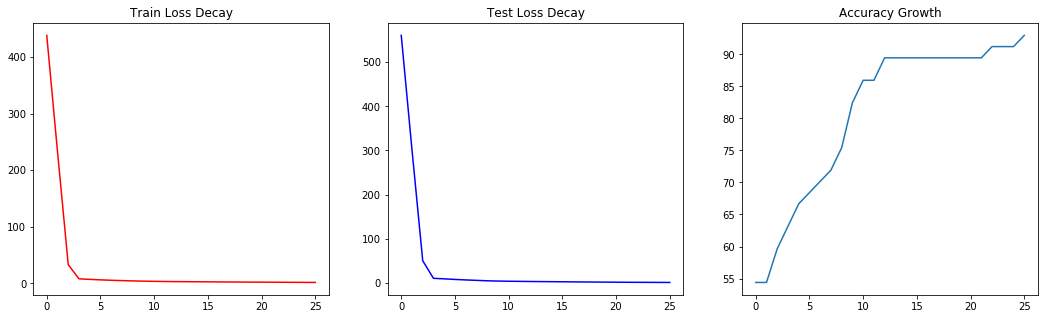

In [158]:
plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
plt.title('Train Loss Decay')
plt.plot(loss_train,'r')
plt.subplot(1,3,2)
plt.title('Test Loss Decay')
plt.plot(loss_test,'b')
plt.subplot(1,3,3)
plt.title('Accuracy Growth')
plt.plot(acc)

## The Loss is Decayed and Accuracy Over Test Data is increased
## i,e. Our model is doing pretty well